**20BRS1075 Aman Gupta**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
import graphviz
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score

In [2]:
data=pd.read_csv("/content/marks.csv")
data.head()

,course,mean,sd,cat1,cat2,fat,marks,grade
0,cse2012,71.27,7.23,11.75,13.8,29.2,85,s
1,cse2038,72.91,10.10,11.75,10.5,29.6,82,a
2,cse2039,78.10,7.71,13.00,12.6,34.0,81,s
3,ece2036,76.90,10.30,12.00,15.0,35.6,92,s
4,mat2010,74.01,8.28,12.00,12.9,35.6,90,s


In [3]:
data=data.drop("course",axis=1)
X=data.iloc[:,:6]
y=data.grade

In [4]:
print(X)
print(y)

     mean     sd   cat1   cat2    fat  marks
0   71.27   7.23  11.75  13.80  29.20     85
1   72.91  10.10  11.75  10.50  29.60     82
2   78.10   7.71  13.00  12.60  34.00     81
3   76.90  10.30  12.00  15.00  35.60     92
4   74.01   8.28  12.00  12.90  35.60     90
5   84.06   5.55  13.50   9.60  29.20     90
6   80.75   5.32  11.50  11.00  34.67     91
7   81.52   6.17  12.00  12.25  33.67     90
8   76.04   8.77  11.00  12.00  34.00     85
9   80.34   9.53  13.00  12.50  35.33     91
10  87.59   3.25  12.50  12.50  32.33     89
11  84.00   9.52  15.00  15.00  38.67     99
0     s
1     a
2     s
3     s
4     s
5     a
6     s
7     a
8     a
9     a
10    a
11    s
Name: grade, dtype: object


In [5]:
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)
print(y)
data.grade=y

[1 0 1 1 1 0 1 0 0 0 0 1]


In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)
print("training dataset:\n",xtrain,"\n",ytrain)
print("\ntesting dataset:\n",xtest,"\n",ytest)

training dataset:
     mean     sd   cat1   cat2    fat  marks
2  78.10   7.71  13.00  12.60  34.00     81
8  76.04   8.77  11.00  12.00  34.00     85
1  72.91  10.10  11.75  10.50  29.60     82
7  81.52   6.17  12.00  12.25  33.67     90
9  80.34   9.53  13.00  12.50  35.33     91
3  76.90  10.30  12.00  15.00  35.60     92
0  71.27   7.23  11.75  13.80  29.20     85
5  84.06   5.55  13.50   9.60  29.20     90 
 [1 0 0 0 0 1 1 0]

testing dataset:
      mean    sd  cat1  cat2    fat  marks
6   80.75  5.32  11.5  11.0  34.67     91
11  84.00  9.52  15.0  15.0  38.67     99
4   74.01  8.28  12.0  12.9  35.60     90
10  87.59  3.25  12.5  12.5  32.33     89 
 [1 1 1 0]


In [7]:
#GINI INDEX
dt=tree.DecisionTreeClassifier()
model= dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print("the predicted y values: ",ypred)
print("the test y values: ",ytest)
print("the score for the training data set is: ",model.score(xtest,ytest))

the predicted y values:  [0 1 1 0]
the test y values:  [1 1 1 0]
the score for the training data set is:  0.75


[Text(0.5, 0.75, 'X[3] <= 12.55\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

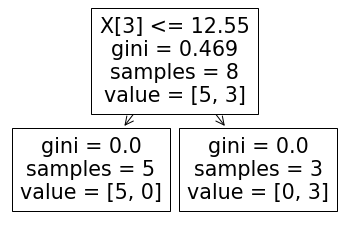

In [8]:
tree.plot_tree(model)

the predicted y values:  [0 1 1 0]
the test y values:  [1 1 1 0]
the score for the training data set is:  0.75


[Text(0.5, 0.75, 'X[3] <= 12.55\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

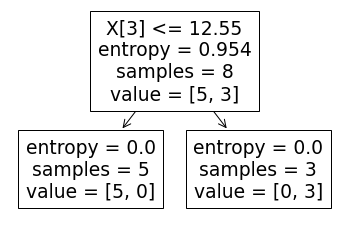

In [9]:
#ENTROPY
dt=tree.DecisionTreeClassifier(criterion='entropy')
model1= dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print("the predicted y values: ",ypred)
print("the test y values: ",ytest)
print("the score for the training data set is: ",model1.score(xtest,ytest))
tree.plot_tree(model1)

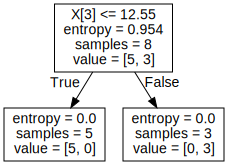

In [10]:
treedata= tree.export_graphviz(model1, out_file=None)
graph = graphviz.Source(treedata)
graph.render("marks")
graph